In [1]:
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

## Compare clustering from different simulations

This notebook uses the pre-computed clustering statistics for "similar" HODs from different simulations to assess the theoretical error arising from finite volume and mass resolution.

In [2]:
# Set up paths.
import sys
#
basedir = "/pscratch/sd/m/mwhite/AnalyzeLAE/"
for subdir in ["odin","mocks","Cobaya/lss_likelihood"]:
    sys.path.append(basedir+subdir)

In [3]:
import json

In [4]:
filt   = "n501"
cosmo  = "c000"
fbase  = "lae_"+filt+"_"+cosmo+"_"

In [5]:
def close_enough(hod1,hod2):
    """Check whether two HODs are close."""
    good = True
    for a,b in zip(hod1,hod2): good &= np.abs(a-b)<1e-2
    return(good)

In [6]:
fiducial_hod = [11.1,12.1,0.5,1.0,0.5]

Box   1250, HOD 0061, nbar=  2.4799e-02, fsat=0.0246, HOD:  11.10  12.10   0.50   1.00   0.50
Box   1000, HOD 0061, nbar=  2.9747e-02, fsat=0.0197, HOD:  11.10  12.10   0.50   1.00   0.50
Box    750, HOD 0097, nbar=  3.1504e-02, fsat=0.0193, HOD:  11.10  12.10   0.50   1.00   0.50


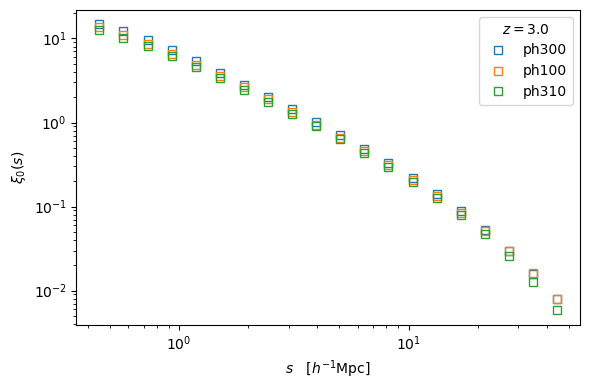

In [7]:
# Our simulation names differ primarily in the phase.
fig,ax = plt.subplots(1,1,figsize=(6,4))
#
icol=0
for phase in [300,100,310]:
    fname = fbase+"ph{:d}".format(phase)+"_s.json"
    lae   = json.load(open(fname,"r"))
    kk,RR = lae['k'],lae['R']
    Lbox  = lae['BoxSize']
    for ihod,itm in enumerate(lae['mocks']):
        if close_enough(itm['hod'],fiducial_hod):
            ss = "Box {:6.0f}, HOD {:04d}, ".format(Lbox,ihod)
            ss+= "nbar={:12.4e}, ".format(itm['nobj']/Lbox**3)
            ss+= "fsat={:.4f}, HOD:".format(itm['fsat'])
            for j in itm['hod']: ss+= " {:6.2f}".format(j)
            print(ss)
            ax.plot(RR,np.array(itm['xi0']),'s',mfc='None',\
                    color='C'+str(icol),label='ph'+str(phase))
            icol = (icol+1)%10
#
ax.legend(title='$z={:.1f}$'.format(lae['Redshift']))
#
ax.set_xlabel(r'$s\quad [h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$\xi_0(s)$')
ax.set_xscale('log')
ax.set_yscale('log')
#
plt.tight_layout()

## The End